In [0]:
import numpy as np
import pandas as pd
import io
from matplotlib import pyplot as plt
from google.colab import files

In [28]:
uploaded = files.upload()

Saving student_scores.csv to student_scores (1).csv


In [29]:
data_set = pd.read_csv(io.BytesIO(uploaded['student_scores.csv']))
data_set

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [30]:
data_set.shape

(25, 2)

In [31]:
data_set.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0.5, 1.0, 'Hours of Study vs Marks Obtained')

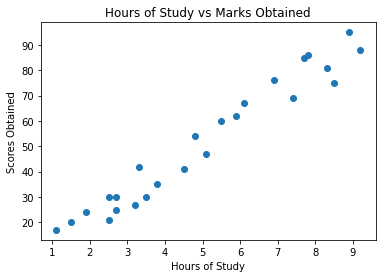

In [32]:
plt.figure()
plt.scatter(data_set['Hours'], data_set['Scores'])
plt.xlabel('Hours of Study')
plt.ylabel('Scores Obtained')
plt.title('Hours of Study vs Marks Obtained')

In [33]:
data_set.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [36]:
data_set.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


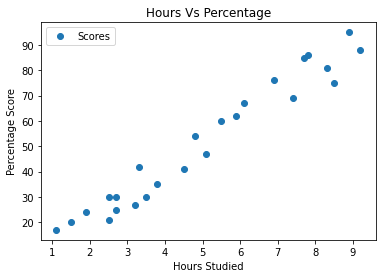

In [35]:
data_set.plot(x="Hours", y="Scores", style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [37]:
x = data_set.iloc[:, 0:1].values
y = data_set.iloc[:, 1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training data', x_train)
print('Testing Data', x_test)
print('training data y', y_train)
print('testing data y', y_test)

Training data [[3.2]
 [8.5]
 [8.3]
 [7.8]
 [2.5]
 [2.7]
 [3.5]
 [1.9]
 [6.9]
 [9.2]
 [6.1]
 [8.9]
 [1.1]
 [4.8]
 [4.5]
 [7.4]
 [1.5]
 [3.8]
 [5.9]
 [5.5]]
Testing Data [[3.3]
 [2.5]
 [2.7]
 [5.1]
 [7.7]]
training data y [27 75 81 86 30 30 30 24 76 88 67 95 17 54 41 69 20 35 62 60]
testing data y [42 21 25 47 85]


In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(regressor.intercept_)

3.7328352490421253


In [41]:
print(regressor.coef_)

[9.54176245]


In [42]:
y_pred = regressor.predict(x_test)
print(y_pred)

[35.22065134 27.58724138 29.49559387 52.39582375 77.20440613]


In [43]:
df = pd.DataFrame(
    {
        'Actual': y_test, 
        'Predicted': y_pred
    }
)
df

,Actual,Predicted
0,42,35.220651
1,21,27.587241
2,25,29.495594
3,47,52.395824
4,85,77.204406


In [44]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r_2 statistics: %.2f' % r2_score(y_test, y_pred))

Mean Squared Error:  39.88957584915072
Root Mean Squared Error:  6.315819491495202
r_2 statistics: 0.92


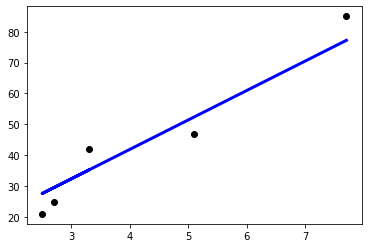

In [45]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

In [46]:
y_pred = regressor.predict([[9]])
y_pred

array([89.60869732])